# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

In [14]:
import pandas as pd
abalone = pd.read_csv(r".\dataset\abalone.csv")
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [3]:
abalone.dtypes

sex            object
length        float64
diameter      float64
height        float64
whole_wt      float64
shucked_wt    float64
viscera_wt    float64
shell_wt      float64
rings           int64
age           float64
dtype: object

In [4]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [5]:
abalone.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [6]:
# create dummy variables for sex column
sex_cols = pd.get_dummies(abalone['sex'], prefix='sex',dtype=float)
abalone_upd = abalone.drop(columns = ['sex'], axis=1)
abalone_upd = pd.concat([abalone, sex_cols], axis=1, join='outer')

In [7]:
# import libraries
import statsmodels.api as sm
import random

In [8]:
# define variables
# Dependent variable --> age
y = abalone_upd[['age']]

# Independent variables --> sex, length, diameter, height, whole_wt, shucked_wt, gut_wt, shell_wt, rings
x = abalone_upd.loc[:, 'length' : 'rings']

In [9]:
# Seperate train and test datasets -- also possible with sklearn.model_selection.train_test_split
# generate random numbers from 0-4177
total_records = len(abalone_upd)
train_records = total_records-1000
test_records = 1000

# randomize indices to train & test datasets
train_set = random.sample(range(0, total_records), k = train_records)
test_set = random.sample(range(0, total_records), k = test_records)

# seperate datasets for train and test
x_train = x.iloc[train_set, :]
y_train = y.iloc[train_set, :]

x_test = x.iloc[test_set, :]
y_test = y.iloc[test_set, :]

In [ ]:
# add constant for all dependent variables
x1 = sm.add_constant(x_train)

# define Regression 
# find coeffecient of each variable -- i..e., weight of each variable over the dependent variable (age)
multi_reg = sm.OLS(y_train, x1).fit()
multi_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.589e+30
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:13:21   Log-Likelihood:                 95520.
No. Observations:                3177   AIC:                        -1.910e+05
Df Residuals:                    3168   BIC:                        -1.910e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5000   3.04e-15   4.93e+14      0.000       1.500       1.500
length     -1.005e-14   1.95e-14     -0.515      0.607   -4.83e-14    2.82e-14
diameter    1.508e-14    2.4e-14      0.629      0.530   -3.19e-14    6.21e-14
height      1.166e-15   1.57e-14      0.074      0.941   -2.97e-14     3.2e-14
whole_wt   -4.856e-15   7.91e-15     -0.614      0.539   -2.04e-14    1.07e-14
shucked_wt  1.357e-15   9.65e-15      0.141      0.888   -1.76e-14    2.03e-14
viscera_wt   1.35e-14   1.41e-14      0.959      0.337   -1.41e-14    4.11e-14
shell_wt    5.062e-15   1.22e-14      0.416      0.678   -1.88e-14    2.89e-14
rings          1.0000   1.74e-16   5.75e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      301.156   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.238
Skew:                          -0.722   Prob(JB):                     4.64e-98
Kurtosis:                       4.140   Cond. No.                         841.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Use heatmap / correlation map to understand each Independent variables correlation (Negative or Positive)

# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

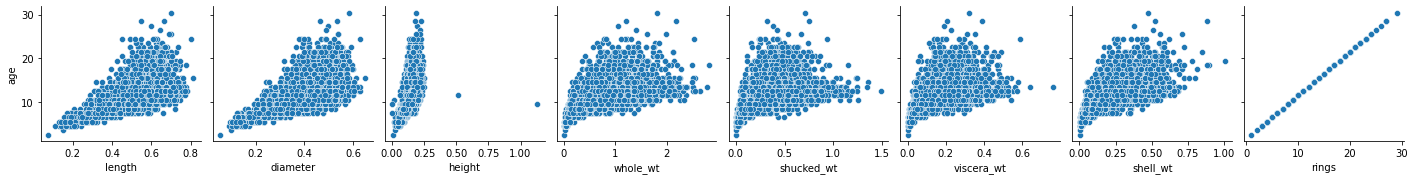

In [12]:
# pairplot - all independent varaibles VS dependent variable, scatter plot)
sns.pairplot(data = abalone_upd, x_vars=x, y_vars=y)
plt.show()

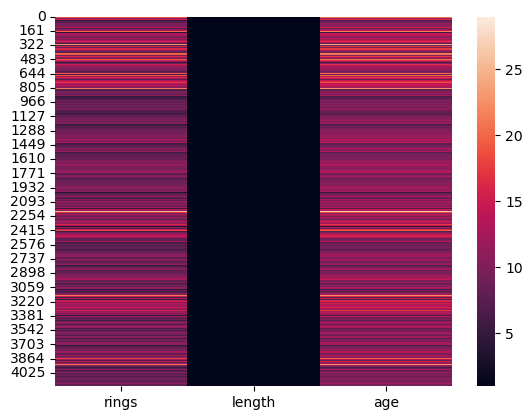

In [13]:
# heatmap of entire dataset
#key_vars = abalone.pivot("sex", "length", "age")

arr = abalone.rings.values
vmin = arr.min()
vmax = arr.max()
sns.heatmap(abalone[['rings','length','age']], vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
abalone.height.max()

1.13

## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!